In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")

In [2]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack'] # under

In [3]:
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state = 0,stratify = y)
sampler = RandomUnderSampler(random_state=11)#sprawdzic jak dokladnie dziala
x_train, y_train = sampler.fit_resample(xtrain, ytrain)#smote,adasyn,2:1

In [4]:
Tree_classifier = RandomForestClassifier(max_depth = 10,class_weight='balanced',random_state=0,)
Tree_classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [5]:
y_pred = Tree_classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41000 16447]
 [ 1007  4966]]
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     57447
         1.0       0.23      0.83      0.36      5973

    accuracy                           0.72     63420
   macro avg       0.60      0.77      0.59     63420
weighted avg       0.91      0.72      0.78     63420



In [6]:
Tree_classifier.feature_importances_

array([0.12711269, 0.08838923, 0.00378257, 0.02884429, 0.02411478,
       0.04729918, 0.03684825, 0.00666301, 0.00520747, 0.00460011,
       0.00308619, 0.00374269, 0.00450092, 0.17890693, 0.01591334,
       0.05176531, 0.0713525 , 0.04288093, 0.20679685, 0.017237  ,
       0.03095576])

In [7]:
sm = SMOTE(random_state=42)

In [8]:
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state = 0,stratify = y)

x_train, y_train = sm.fit_resample(xtrain, ytrain)#smote,adasyn,2:1


In [9]:
Tree_classifier = RandomForestClassifier(max_depth = 10,class_weight='balanced',random_state=0,)
Tree_classifier.fit(x_train,y_train)
y_pred = Tree_classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52030  5417]
 [ 3242  2731]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     57447
         1.0       0.34      0.46      0.39      5973

    accuracy                           0.86     63420
   macro avg       0.64      0.68      0.65     63420
weighted avg       0.88      0.86      0.87     63420



In [10]:
Tree_classifier.feature_importances_

array([0.17259818, 0.19644369, 0.00031859, 0.00221222, 0.07459462,
       0.04007732, 0.01303156, 0.02564023, 0.01814025, 0.01125568,
       0.00444089, 0.00110906, 0.00360808, 0.13724836, 0.00223092,
       0.00944058, 0.08099991, 0.08563865, 0.09931103, 0.01289958,
       0.00876063])

In [3]:
adasyn = ADASYN()


In [4]:
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state = 0,stratify = y)

x_train, y_train = adasyn.fit_resample(xtrain, ytrain)#smote,adasyn,2:1


In [5]:
Tree_classifier = RandomForestClassifier(max_depth = 10,class_weight='balanced',random_state=0,)
Tree_classifier.fit(x_train,y_train)
y_pred = Tree_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52058  5389]
 [ 3282  2691]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     57447
         1.0       0.33      0.45      0.38      5973

    accuracy                           0.86     63420
   macro avg       0.64      0.68      0.65     63420
weighted avg       0.88      0.86      0.87     63420



In [6]:
Tree_classifier.feature_importances_

array([0.17961979, 0.1870647 , 0.00062413, 0.00232358, 0.08126382,
       0.04107568, 0.00960736, 0.02990316, 0.02055707, 0.01172725,
       0.00463215, 0.00114335, 0.00336482, 0.11839888, 0.00163082,
       0.00441392, 0.07837074, 0.09694418, 0.09928389, 0.01581465,
       0.01223608])

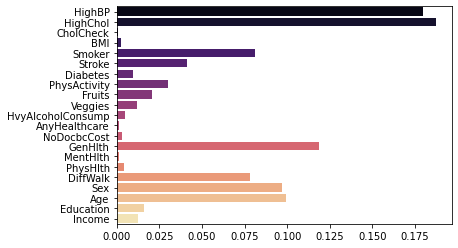

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 
danex = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
daney = Tree_classifier.feature_importances_
sns.barplot(x = daney,y=danex, palette = 'magma')

plt.savefig('../Plots/TreeFeature.png')

In [21]:
datafr = pd.DataFrame({"Feature":danex,
                      "Valie":daney})

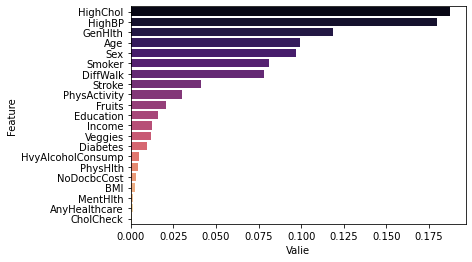

In [26]:
sns.barplot(x = 'Valie',y='Feature', data = datafr,palette = 'magma',order=datafr.sort_values('Valie',ascending = False).Feature)

plt.savefig('../Plots/TreeFeature2.png')

In [11]:
sorted(slow)

['Age',
 'AnyHealthcare',
 'BMI',
 'CholCheck',
 'Diabetes',
 'DiffWalk',
 'Education',
 'Fruits',
 'GenHlth',
 'HighBP',
 'HighChol',
 'HvyAlcoholConsump',
 'Income',
 'MentHlth',
 'NoDocbcCost',
 'PhysActivity',
 'PhysHlth',
 'Sex',
 'Smoker',
 'Stroke',
 'Veggies']

In [13]:
slow

{'HighBP': 0.17961979043445855,
 'HighChol': 0.18706469548016189,
 'CholCheck': 0.0006241332386545045,
 'BMI': 0.0023235750470650606,
 'Smoker': 0.08126381547264509,
 'Stroke': 0.04107568027352064,
 'Diabetes': 0.009607360565283616,
 'PhysActivity': 0.029903155786838685,
 'Fruits': 0.020557066219455,
 'Veggies': 0.011727251918458559,
 'HvyAlcoholConsump': 0.004632147971667288,
 'AnyHealthcare': 0.001143349383018135,
 'NoDocbcCost': 0.0033648245707730397,
 'GenHlth': 0.11839888035635661,
 'MentHlth': 0.0016308216995747536,
 'PhysHlth': 0.004413919187230716,
 'DiffWalk': 0.07837073600685855,
 'Sex': 0.09694418497485244,
 'Age': 0.09928389011194383,
 'Education': 0.01581464574234028,
 'Income': 0.012236075558842926}

In [17]:
sort = sorted(slow.values())

[0.0006241332386545045, 0.001143349383018135, 0.0016308216995747536, 0.0023235750470650606, 0.0033648245707730397, 0.004413919187230716, 0.004632147971667288, 0.009607360565283616, 0.011727251918458559, 0.012236075558842926, 0.01581464574234028, 0.020557066219455, 0.029903155786838685, 0.04107568027352064, 0.07837073600685855, 0.08126381547264509, 0.09694418497485244, 0.09928389011194383, 0.11839888035635661, 0.17961979043445855, 0.18706469548016189]
